<a href="https://colab.research.google.com/github/mutrejadipin/dataAnalysis_foodDelivery/blob/main/FoodDelivery_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data analysis on csv data set given

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("orders.csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [6]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

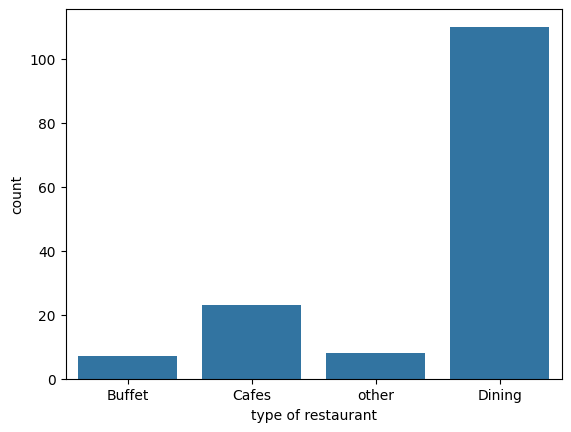

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurant')


Text(0, 0.5, 'Votes gained')

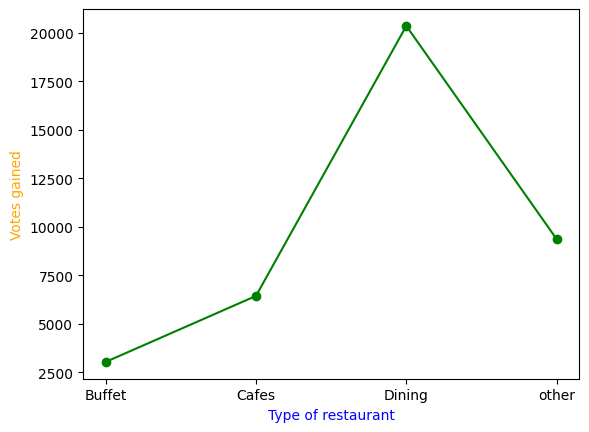

In [15]:
grp_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grp_data})
plt.plot(result, c ='green', marker='o')
plt.xlabel('Type of restaurant', c='blue', size=10)
plt.ylabel('Votes gained', c='orange', size=10)


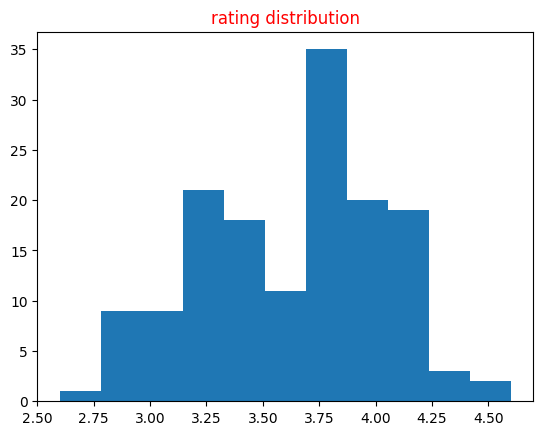

In [22]:
plt.hist(df['rate'], bins=11)
plt.title('rating distribution', c='red')
plt.show()

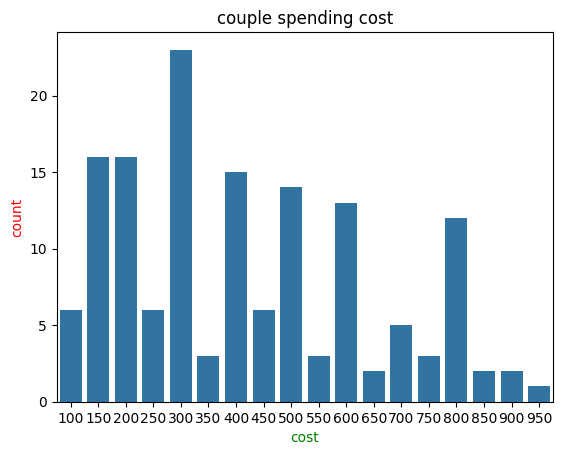

In [29]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.ylabel('count', c='red')
plt.xlabel('cost', c='green')
plt.title('couple spending cost')
plt.show()

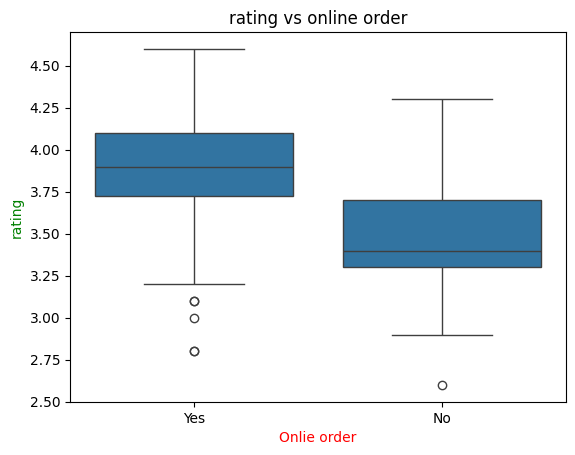

In [40]:
#plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Onlie order', c='red')
plt.ylabel('rating', c='green')
plt.title('rating vs online order')
plt.show()


In [55]:
pivot=df.pivot_table(index='listed_in(type)', columns='online_order',  aggfunc='size')
print(pivot)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


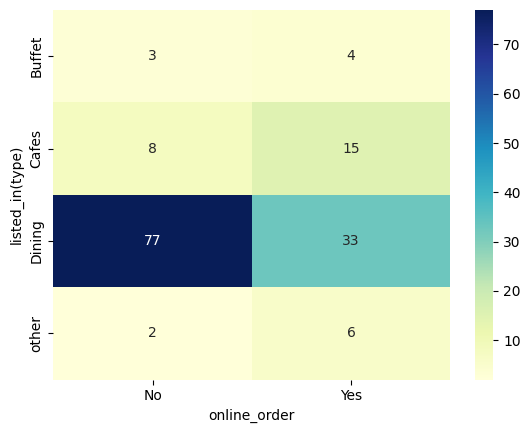

In [56]:
sns.heatmap(pivot, cmap='YlGnBu', annot=True)
plt.show()